### **Dylan Gordon and Dominick Kubica's Python for Analytic Showdown**

#1: Identify Factors Influencing Customer Engagement
Objective: Analyze what factors most significantly influence customer engagement, measured by charge
count and monthly points. Based on the dataset, identify key factors that influence how often customers
charge their devices and accumulate loyalty points. Consider factors such as:
● Franchisee or Region: Do certain areas have more engaged customers?
● Previous Lighting Systems: Does the type of lighting system previously used by customers
influence engagement with solar power banks?
● Customer Type: Do certain customer types exhibit more engagement?
● Subscription Date: Do customers who subscribe at certain times of the year exhibit higher
engagement levels (e.g., seasonal patterns)?
Use this information to help the company improve customer retention and increase usage of their services.
#2: Create a Predictive Model for Customer Retention
Objective: Develop a predictive model that forecasts which customers are likely to continue using the
service (based on status or charge count). Using the current dataset, build a model to predict which
customers are likely to remain active users based on factors like:
● Customer Points History: Do customers with higher points tend to stay longer?
● Subscription Duration: Are customers who have been with the company for a certain length of
time more likely to continue?
● Franchisee Performance: Does the performance of the franchisee or region impact customer
retention?
Test this predictive model by analyzing customer engagement over time (charge count, unsubscribe date,
etc.).
#3: Loyalty Program Effectiveness
Objective: Analyze the effectiveness of the loyalty program by identifying which customers have
accumulated the most points and determining the correlation between points and engagement.

● Are customers who earn more points through the loyalty program more likely to use the service
frequently (e.g., based on charge count or subscription time)?
● What types of customers (e.g., those with specific franchisee codes or regions) engage more with
the loyalty program?
This analysis can guide strategies for improving the loyalty program.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Add your drive
import os
os.chdir('drive/Shared drives')
os.chdir('AnalyticsShowdownDDGK') # Change this to your drive!!!!!

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: 'drive/Shared drives'

In [ ]:
pip install pandas numpy seaborn matplotlib statsmodels scikit-learn tensorflow


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import statsmodels.api as sm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy.stats import pearsonr

data_path = 'Sheet 1-Analytics Showdown Submission Data.csv'
data = pd.read_csv(data_path)

data_path1 = 'PopulationAS2.csv'
datapop = pd.read_csv(data_path1)

# Display basic info
print(data.info())
print(data.head())
print(datapop)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20173 entries, 0 to 20172
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Customer No.            20173 non-null  int64 
 1   Customer Code           20173 non-null  object
 2   Area Zone               19839 non-null  object
 3   Address Description     17533 non-null  object
 4   Gender                  19657 non-null  object
 5   Type                    5381 non-null   object
 6   Franchisee              20173 non-null  object
 7   Franchisee Code         19972 non-null  object
 8   Status                  20173 non-null  object
 9   Points                  20173 non-null  int64 
 10  Points Monthly          11856 non-null  object
 11  Charge Count            20173 non-null  int64 
 12  Subscription Date-Time  20169 non-null  object
 13  Unsubscribe Date-Time   3488 non-null   object
 14  Items                   14252 non-null  object
 15  It

In [ ]:
import pandas as pd
from IPython.display import display

def pretty_display(df, title="Styled Table", color_map="Blues"):
    styled_df = (
        df.style
        .set_caption(title)  # Set the title
        .format(precision=2)  # Set decimal precision for all numeric columns
        .background_gradient(cmap=color_map)  # Apply background gradient
        .set_properties(**{'text-align': 'center'})  # Center-align text
        .set_table_styles([{
            'selector': 'caption',
            'props': [
                ('font-size', '16px'),
                ('font-weight', 'bold'),
                ('color', '#333')
            ]
        }])  # Style for the title
    )
    display(styled_df)

# Use pretty_display instead of print
pretty_display(datapop, title="Area Zone Statistics", color_map="Blues")


,area zone,points,charge count,population
0,Antsirabe,1584793,1585371,"427,109"
1,Bongolava,963643,971980,"750,000"
2,Antananarivo,894874,914044,"4,000,000"
3,Fianarantsoa,678898,690310,"200,000"
4,Majunga,337923,341401,"258,000"
5,Tamatave,294718,300420,"529,544"
6,Fort Dauphin,171043,172453,"361,000"
7,Ambalavao,168853,189029,"316,000"


In [ ]:
print(data.nunique())

unique_addresses = data.groupby('Area Zone')['Address Description'].nunique()
print(unique_addresses)


Customer No.              20173
Customer Code             19937
Area Zone                    13
Address Description        5511
Gender                        2
Type                          3
Franchisee                  207
Franchisee Code             173
Status                        3
Points                     1433
Points Monthly             8948
Charge Count               1444
Subscription Date-Time    20160
Unsubscribe Date-Time      3314
Items                     13638
Items Count                  19
Current Lighting              4
dtype: int64
Area Zone
0                      1
Ambalavao            265
Antananarivo        1350
Antsirabe            520
Bongolava           1151
Defectueux           153
Fianarantsoa        1094
Fort Dauphin         128
Majunga              456
Powerbank Hasina     162
Tamatave             352
Test Area             42
Unknown                9
Name: Address Description, dtype: int64


1: Identify Factors Influencing Customer Engagement
Objective: Analyze what factors most significantly influence customer engagement, measured by charge count and monthly points.

● Franchisee or Region: Do certain areas have more engaged customers?

● Previous Lighting Systems: Does the type of lighting system previously used by customers influence engagement with solar power banks?

● Customer Type: Do certain customer types exhibit more engagement?

● Subscription Date: Do customers who subscribe at certain times of the year exhibit higher engagement levels (e.g., seasonal patterns)? Use this information to help the company improve customer retention and increase usage of their services.

In [ ]:
# Convert 'population' column to string, replace commas, and convert to integer
datapop['population'] = datapop['population'].astype(str).replace('nan', '0')  # Replace NaN with '0' as string
datapop['population'] = datapop['population'].str.replace(',', '').astype(int)  # Remove commas and convert to integer

# Display the updated DataFrame
print(datapop.style.set_caption("Area Zone Statistics").background_gradient(cmap="Blues"))

# Check for any inconsistencies in column names
print("Column names in data:", data.columns)
print("Column names in datapop:", datapop.columns)



Column names in data: Index(['Customer No.', 'Customer Code', 'Area Zone', 'Address Description',
       'Gender', 'Type', 'Franchisee', 'Franchisee Code', 'Status', 'Points',
       'Points Monthly', 'Charge Count', 'Subscription Date-Time',
       'Unsubscribe Date-Time', 'Items', 'Items Count', 'Current Lighting'],
      dtype='object')
Column names in datapop: Index(['Area Zone', 'points', 'charge count', 'population',
       'unique franchisees'],
      dtype='object')


In [ ]:
import pandas as pd

# Step 1: Filter out unwanted 'Area Zone' entries from the 'data' DataFrame
filtered_data = data[~data['Area Zone'].isin(['Unknown', '0', 'Test Area']) & data['Franchisee'].notna()]

# Step 2: Calculate the number of unique franchisees per area zone
unique_franchisees_per_zone = (
    filtered_data.groupby('Area Zone')['Franchisee']
    .nunique()
    .reset_index()
)

# Rename the columns for clarity
unique_franchisees_per_zone.columns = ['Area Zone', 'unique franchisees']

# Step 3: Merge this information back into the `datapop` DataFrame
# Ensure the 'Area Zone' column in `datapop` is capitalized
datapop.rename(columns={'area zone': 'Area Zone'}, inplace=True)

# Step 4: Merge the `unique_franchisees_per_zone` data into `datapop` based on 'Area Zone'
datapop = datapop.merge(unique_franchisees_per_zone, on='Area Zone', how='left')

# Step 5: Fill any NaN values in 'unique franchisees' with 0 (in case there were zones without franchisees)
datapop['unique franchisees'] = datapop['unique franchisees'].fillna(0).astype(int)

# Step 6: Display the updated `datapop` DataFrame
print(datapop)


# Filter out unwanted 'area zone' entries
filtered_data = data[~data['area zone'].isin(['Unknown', '0', 'Test Area']) & data['Franchisee'].notna()]

# Calculate the number of unique franchisees per area zone
unique_franchisees_per_zone = filtered_data.groupby('area zone')['Franchisee'].nunique().reset_index()
unique_franchisees_per_zone.columns = ['area zone', 'unique franchisees']

# Merge this information back into the `datapop` DataFrame
# For demonstration, let's create a `datapop` DataFrame similar to the one shown in the user's example.
datapop = pd.DataFrame({
    'area zone': ['Antsirabe', 'Bongolava', 'Antananarivo', 'Fianarantsoa'],
    'points': [1584793, 963643, 894874, 678898],
    'charge count': [1585371, 971980, 914044, 690310],
    'population': ['427,109', '750,000', '4,000,000', '200,000']
})

# Merge the `unique_franchisees_per_zone` data into `datapop` based on 'area zone'
datapop = datapop.merge(unique_franchisees_per_zone, on='area zone', how='left')

# Fill any NaN values in 'unique franchisees' with 0 (in case there were zones without franchisees)
datapop['unique franchisees'] = datapop['unique franchisees'].fillna(0).astype(int)

# Display the updated `datapop` DataFrame
print(datapop)


MergeError: Passing 'suffixes' which cause duplicate columns {'unique franchisees_x'} is not allowed.

In [ ]:
#Find associations of Charge Count and Points by Area Zone
#ADDED A NEW DATAFRAME WITH POPULATION METRICS!!! Some area zones were regions and others were cities. ASK Whether or not franchisees are concentrated in cities or evenly spread out over regions
areazone = data.groupby('Area Zone')[['Points', 'Charge Count']].sum().sort_values(by='Points', ascending=False)
datapop['population'] = pd.to_numeric(datapop['population'], errors='coerce')
datapop['Points per Capita'] = datapop['points'] / datapop['population']
datapop['Charge Count per Capita'] = datapop['charge count'] / datapop['population']
print(datapop[['Area Zone', 'population', 'Points per Capita', 'Charge Count per Capita']])

# Calculate charges per franchisee and add it as a new column in `datapop`
datapop['Charges per Franchisee'] = datapop['charge count'] / datapop['unique franchisees']

# Fill any NaN or infinite values with 0 (in case unique franchisees is 0 in some regions)
datapop['Charges per Franchisee'].replace([float('inf'), float('nan')], 0, inplace=True)

# Display the updated `datapop` DataFrame with the new column
print(datapop.style.set_caption("Area Zone Statistics").background_gradient(cmap="Reds"))


pretty_display(datapop, title="Area Zone Statistics", color_map="Reds")

      Area Zone  population  Points per Capita  Charge Count per Capita
0     Antsirabe      427109           3.710512                 3.711865
1     Bongolava      750000           1.284857                 1.295973
2  Antananarivo     4000000           0.223718                 0.228511
3  Fianarantsoa      200000           3.394490                 3.451550
4       Majunga      258000           1.309779                 1.323260
5      Tamatave      529544           0.556551                 0.567318
6  Fort Dauphin      361000           0.473803                 0.477709
7     Ambalavao      316000           0.534345                 0.598193


<ipython-input-27-c863b922888f>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datapop['Charges per Franchisee'].replace([float('inf'), float('nan')], 0, inplace=True)


,Area Zone,points,charge count,population,unique franchisees_x,unique franchisees_y,unique franchisees,Points per Capita,Charge Count per Capita,Charges per Franchisee
0,Antsirabe,1584793,1585371,427109,22,22,22,3.71,3.71,72062.32
1,Bongolava,963643,971980,750000,27,27,27,1.28,1.30,35999.26
2,Antananarivo,894874,914044,4000000,35,35,35,0.22,0.23,26115.54
3,Fianarantsoa,678898,690310,200000,51,51,51,3.39,3.45,13535.49
4,Majunga,337923,341401,258000,10,10,10,1.31,1.32,34140.10
5,Tamatave,294718,300420,529544,12,12,12,0.56,0.57,25035.00
6,Fort Dauphin,171043,172453,361000,10,10,10,0.47,0.48,17245.30
7,Ambalavao,168853,189029,316000,5,5,5,0.53,0.60,37805.80


In [ ]:
antananarivo is the capital and most populated city. Antsirabe and Fianarantsoa are rural, inland, agricultural communities.

In [ ]:
# Filter out rows where 'Current Lighting' is 'Sélectionner'
filtered_data = data[data['Current Lighting'] != 'Sélectionner']

# Group by 'Current Lighting' and calculate the sum of 'Charge Count'
lighting = filtered_data.groupby('Current Lighting')[['Charge Count']].sum()

# Display the result
pretty_display(lighting, title="Base Lighting Metrics")


,Charge Count
Current Lighting,
Candle,266126
Kerosine,485763
Torch,329758


From Chatgpt: Here’s a comparison of the lighting costs for a small house in Madagascar using kerosene, candles, and battery-powered torches based on recent prices:

Kerosene Lamps: As of October 2024, kerosene costs MGA 2,430 per liter (about USD 0.53). A typical kerosene lamp consumes around 0.04 liters per hour, which equates to approximately **MGA 97 per hour**. Kerosene is relatively affordable for steady, continuous lighting but involves health and environmental risks due to emissions.

Candles: Candle costs vary widely, but basic candles are typically affordable in Madagascar. For simplicity, if a candle costs around MGA 200 and burns for 4-6 hours, it would cost about **MGA 33-50 per hour**. Candles are less bright than kerosene lamps, making them suitable for smaller spaces or occasional use rather than for primary lighting.

Battery-Powered Torches: Batteries are relatively expensive, so torches are more cost-effective for intermittent use rather than constant lighting. Rechargeable batteries could reduce long-term costs, but upfront investment in rechargeable batteries and chargers is higher.

Dylan and Dominick's Analysis - IETP.com/jiro-ve - Estimates 250 MGA a day. Assuming it's used for 5 hours a day, price per hour is around 50 MGA per hour. This puts the price lower than kerosine. Assuming multiple candles are needed to light a home/room, the expense for candles is more than 100MGA an hour.Jiro-ve batteries propose a more effective and cheaper alternative to lighting a home. Advertising/ marketing could focus on price per hour benefits.

*** ASK ABOUT WHAT KIND OF TORCHES? FLAME, BATTERY?***

In [ ]:
# Group by 'Type' and 'Current Lighting' to find associations with Points and Charge Count
lighting_by_type = data.groupby(['Type','Current Lighting'])[['Charge Count']].sum()
# Display the results
pretty_display(lighting_by_type, title="Lighting Metrics Grouped by Type", color_map="Greens")


In [ ]:
# Filter out rows with unwanted values in 'Current Lighting' and 'Area Zone'
filtered_data = data[
    (data['Current Lighting'] != 'Sélectionner') &
    (~data['Area Zone'].isin(['Unknown', '0', 'Test Area','Powerbank Hasina']))
]

# Group by 'Area Zone' and 'Current Lighting' and calculate the sum of 'Charge Count'
lighting = filtered_data.groupby(['Area Zone', 'Current Lighting'])[['Charge Count']].sum()

# Display the result
pretty_display(lighting, title="Base Lighting Metrics (Excluding 'Sélectionner' and Specified Area Zones)")


In [ ]:
# Filter out rows with 'Sélectionner' in 'Current Lighting' and drop any NaN values in 'Charge Count'
filtered_data = data[(data['Current Lighting'] != 'Sélectionner') & data['Charge Count'].notna()]

# Calculate the number of unique customers for each lighting type
customer_counts = filtered_data.groupby('Current Lighting')['Customer No.'].nunique()

# Calculate the total charges for each lighting type
total_charges = filtered_data.groupby('Current Lighting')['Charge Count'].sum()

# Calculate the average charges per customer for each lighting type
average_charges_per_customer = total_charges / customer_counts

# Display the results
average_charges_per_customer = average_charges_per_customer.reset_index()
average_charges_per_customer.columns = ['Current Lighting', 'Average Charges per Customer']
print(average_charges_per_customer)



  Current Lighting  Average Charges per Customer
0           Candle                    151.379977
1         Kerosine                    137.726963
2            Torch                    149.890000


In [ ]:
import pandas as pd
from datetime import datetime

# Copy the original data to a new dataframe
calcdf = data.copy()

# Convert 'Subscription Date-Time' and 'Unsubscribe Date-Time' columns to datetime format
calcdf['Subscription Date-Time'] = pd.to_datetime(calcdf['Subscription Date-Time'], errors='coerce')
calcdf['Unsubscribe Date-Time'] = pd.to_datetime(calcdf['Unsubscribe Date-Time'], errors='coerce')

# Set a default unsubscribe date for still-subscribed customers
default_unsubscribe_date = datetime(2024, 10, 25)

# Calculate the effective unsubscribe date (using default date if no actual unsubscribe date exists)
calcdf['Effective Unsubscribe Date'] = calcdf['Unsubscribe Date-Time'].fillna(default_unsubscribe_date)

# Calculate the number of days subscribed
calcdf['Days Subscribed'] = (calcdf['Effective Unsubscribe Date'] - calcdf['Subscription Date-Time']).dt.days

# Filter out entries with 'Sélectionner' in 'Current Lighting'
calcdf = calcdf[calcdf['Current Lighting'] != 'Sélectionner']

# Calculate the average number of days subscribed per lighting type
average_days_subscribed = calcdf.groupby('Current Lighting')['Days Subscribed'].mean().reset_index()

# Rename columns for clarity
average_days_subscribed.columns = ['Current Lighting', 'Average Days Subscribed']

# Assuming `average_charges_per_customer` and `average_days_subscribed` already exist

# Merge `average_days_subscribed` with `average_charges_per_customer` on 'Current Lighting'
average_charges_per_customer = pd.merge(
    average_charges_per_customer,
    average_days_subscribed,
    on='Current Lighting',
    how='left'
)

# Display the updated dataframe
print(average_charges_per_customer)
pretty_display(average_charges_per_customer, title="Average Charges by Current Lighting)",color_map="Reds")

  Current Lighting  Average Charges per Customer  Average Days Subscribed
0           Candle                    151.379977               268.990330
1         Kerosine                    137.726963               255.075702
2            Torch                    149.890000               262.180909


,Current Lighting,Average Charges per Customer,Average Days Subscribed
0,Candle,151.38,268.99
1,Kerosine,137.73,255.08
2,Torch,149.89,262.18


In [ ]:
#Customer Type: Do certain customer types exhibit more engagement? The only customer metrics listed are male vs female
Gender = data.groupby('Gender')[['Points', 'Charge Count']].sum().sort_values(by='Points', ascending=False)
Gender

,Points,Charge Count
Gender,,
Female,3696059,3744272
Male,1552751,1583152


Many more females are ordering the batteries. Perhaps the health based familial marketing is working?

In [ ]:
# Group by 'Gender' and 'Current Lighting' and calculate the sum of 'Charge Count'
gender_lighting_charge_count = data.groupby(['Gender', 'Current Lighting'])['Charge Count'].sum()

# Display the results
print(gender_lighting_charge_count)



Gender  Current Lighting
Female  Candle              161126
        Kerosine            243964
        Sélectionner           764
        Torch               184391
Male    Candle              105000
        Kerosine            241799
        Sélectionner           163
        Torch               145367
Name: Charge Count, dtype: int64


There are some missing values for previous lighting, but based on what we do have; The biggest discrepancy is the number of candles being the previous source of light. We prophesize that perhaps the allure of a smoke free alternative is more attractive for women than for men. Showing that health based advertising may be a suitable avenue to approach or maintain in the future.

In [ ]:
#Subscription Date: Do customers who subscribe at certain times of the year exhibit higher engagement levels (e.g., seasonal patterns)?

# Convert 'Subscription Date-Time' to datetime format
data['Subscription Date-Time'] = pd.to_datetime(data['Subscription Date-Time'], errors='coerce')

# Drop rows where 'Subscription Date-Time' couldn't be converted to a datetime
data = data.dropna(subset=['Subscription Date-Time'])

# Extract the month from 'Subscription Date-Time'
data['Month'] = data['Subscription Date-Time'].dt.month

# Group by 'Month' and sum 'Charge Count'
monthly_charge_count = data.groupby('Month')['Charge Count'].sum().reset_index()
print("Monthly Charge Count:")
print(monthly_charge_count)

# Define seasons based on months
def get_season(month):
    if month in [12, 1, 2]:  # December, January, February
        return 'Winter'
    elif month in [3, 4, 5]:  # March, April, May
        return 'Spring'
    elif month in [6, 7, 8]:  # June, July, August
        return 'Summer'
    elif month in [9, 10, 11]:  # September, October, November
        return 'Fall'

# Apply the function to create a 'Season' column
data['Season'] = data['Month'].apply(get_season)

# Group by 'Season' and sum 'Charge Count'
seasonal_charge_count = data.groupby('Season')['Charge Count'].sum().reset_index()
print("\nSeasonal Charge Count:")
print(seasonal_charge_count)


Monthly Charge Count:
    Month  Charge Count
0       1        222802
1       2        487645
2       3        782810
3       4        327542
4       5        342014
5       6        491139
6       7        470249
7       8        360627
8       9        564506
9      10        528144
10     11        303373
11     12        551484

Seasonal Charge Count:
   Season  Charge Count
0    Fall       1396023
1  Spring       1452366
2  Summer       1322015
3  Winter       1261931


<ipython-input-9-e2c82851a61a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Subscription Date-Time'].dt.month
<ipython-input-9-e2c82851a61a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Season'] = data['Month'].apply(get_season)


The data above measures the number of total charges from customers who signed up in each month. When looking at seasons I dont see any correlation, however I see that January and November had subscribers who do not use the service as often as subscribers from March. This could be a coincidence. Maybe we can look at if certain months have better retention than others?

In [ ]:
import pandas as pd
from datetime import datetime

# Convert 'Subscription Date-Time' and 'Unsubscribe Date-Time' columns to datetime format
data['Subscription Date-Time'] = pd.to_datetime(data['Subscription Date-Time'], errors='coerce')
data['Unsubscribe Date-Time'] = pd.to_datetime(data['Unsubscribe Date-Time'], errors='coerce')

# Drop rows where 'Subscription Date-Time' is missing as it's required for this analysis
data = data.dropna(subset=['Subscription Date-Time'])

# Task 1: Most Common Unsubscribe Months
# Extract the month of unsubscription
data['Unsubscribe Month'] = data['Unsubscribe Date-Time'].dt.month

# Count the number of unsubscriptions per month
unsubscribe_counts = data['Unsubscribe Month'].value_counts().sort_index().reset_index()
unsubscribe_counts.columns = ['Month', 'Unsubscribe Count']
print("Most Common Unsubscribe Months:")
print(unsubscribe_counts)

# Task 2: Average Subscription Duration by Sign-Up Month
# Calculate subscription duration for users who unsubscribed
data['Duration (Days)'] = (data['Unsubscribe Date-Time'] - data['Subscription Date-Time']).dt.days

# For users still subscribed, use the current date to calculate the duration
data['Duration (Days)'].fillna((datetime.now() - data['Subscription Date-Time']).dt.days, inplace=True)

# Extract the subscription month
data['Subscription Month'] = data['Subscription Date-Time'].dt.month

# Calculate the average duration for each subscription month
average_duration_by_month = data.groupby('Subscription Month')['Duration (Days)'].mean().reset_index()
average_duration_by_month.columns = ['Month', 'Average Subscription Duration (Days)']
print("\nAverage Subscription Duration by Month of Subscription:")
print(average_duration_by_month)


Most Common Unsubscribe Months:
    Month  Unsubscribe Count
0     1.0                240
1     2.0                209
2     3.0                213
3     4.0                294
4     5.0                166
5     6.0                163
6     7.0                346
7     8.0                473
8     9.0                748
9    10.0                256
10   11.0                201
11   12.0                177

Average Subscription Duration by Month of Subscription:
    Month  Average Subscription Duration (Days)
0       1                            439.732533
1       2                            363.538934
2       3                            523.102658
3       4                            561.945917
4       5                            488.459254
5       6                            526.513304
6       7                            566.291420
7       8                            521.628556
8       9                            554.899708
9      10                            585.394108
10    

<ipython-input-30-8d27f2a7a720>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Unsubscribe Month'] = data['Unsubscribe Date-Time'].dt.month
<ipython-input-30-8d27f2a7a720>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Duration (Days)'] = (data['Unsubscribe Date-Time'] - data['Subscription Date-Time']).dt.days
<ipython-input-30-8d27f2a7a720>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior wil

In [ ]:
# Convert 'Subscription Date-Time' and 'Unsubscribe Date-Time' to datetime if not already done
data['Subscription Date-Time'] = pd.to_datetime(data['Subscription Date-Time'], errors='coerce')
data['Unsubscribe Date-Time'] = pd.to_datetime(data['Unsubscribe Date-Time'], errors='coerce')

# Extract the month of subscription and unsubscription
data['Subscription Month'] = data['Subscription Date-Time'].dt.month
data['Unsubscribe Month'] = data['Unsubscribe Date-Time'].dt.month

# Calculate the count of subscriptions by month
subscriptions_by_month = data['Subscription Month'].value_counts().sort_index().reset_index()
subscriptions_by_month.columns = ['Month', 'Subscription Count']

# Calculate the count of unsubscriptions by month of initial subscription
# Filter only rows where 'Unsubscribe Date-Time' is present
unsubscribed_by_initial_month = data.dropna(subset=['Unsubscribe Date-Time'])
unsubscriptions_by_month = unsubscribed_by_initial_month['Subscription Month'].value_counts().sort_index().reset_index()
unsubscriptions_by_month.columns = ['Month', 'Unsubscribe Count']

# Merge the two tables to have subscriptions and unsubscriptions in one table
combined_data = pd.merge(subscriptions_by_month, unsubscriptions_by_month, on='Month', how='left')
combined_data['Unsubscribe Count'].fillna(0, inplace=True)  # Fill NaN with 0 for months with no unsubscriptions

# Calculate the ratio of unsubscribed to subscribed
combined_data['Unsubscribe to Subscription Ratio'] = combined_data['Subscription Count']/combined_data['Unsubscribe Count']

# Display the final table
print("Monthly Subscription vs Unsubscription with Ratio:")
print(combined_data)


# Optional: Use pretty_display if available
pretty_display(combined_data, title="Loyalty by Subscription Month", color_map="Purples")


Monthly Subscription vs Unsubscription with Ratio:
    Month  Subscription Count  Unsubscribe Count  \
0     1.0                 916                 70   
1     2.0                2440                286   
2     3.0                3010                785   
3     4.0                 943                152   
4     5.0                1313                238   
5     6.0                1804                327   
6     7.0                2028                441   
7     8.0                1828                311   
8     9.0                1715                318   
9    10.0                1799                311   
10   11.0                1266                121   
11   12.0                1107                126   

    Unsubscribe to Subscription Ratio  
0                           13.085714  
1                            8.531469  
2                            3.834395  
3                            6.203947  
4                            5.516807  
5                            5.5

<ipython-input-101-a2ca630b092d>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['Unsubscribe Count'].fillna(0, inplace=True)  # Fill NaN with 0 for months with no unsubscriptions


,Month,Subscription Count,Unsubscribe Count,Unsubscribe to Subscription Ratio
0,1.00,916,70,13.09
1,2.00,2440,286,8.53
2,3.00,3010,785,3.83
3,4.00,943,152,6.20
4,5.00,1313,238,5.52
5,6.00,1804,327,5.52
6,7.00,2028,441,4.60
7,8.00,1828,311,5.88
8,9.00,1715,318,5.39
9,10.00,1799,311,5.78


retention rate (the unsubscribe is based on the month they signed up. This is showing that for any person that signs up in a month how likely are you to keep them as a consumer.) ^ January and November singups are the most loyal. March and July are the least loyal. People who sign-up in wintee months are more likely to keep the subscription. They are more valuable.

In [ ]:
import pandas as pd

# Ensure 'Subscription Date-Time' and 'Unsubscribe Date-Time' are in datetime format
data['Subscription Date-Time'] = pd.to_datetime(data['Subscription Date-Time'], errors='coerce')
data['Unsubscribe Date-Time'] = pd.to_datetime(data['Unsubscribe Date-Time'], errors='coerce')

# Extract the month of subscription and month of actual unsubscription
data['Subscription Month'] = data['Subscription Date-Time'].dt.month
data['Unsubscribe Actual Month'] = data['Unsubscribe Date-Time'].dt.month

# Count of subscriptions by the initial subscription month
subscriptions_by_month = data['Subscription Month'].value_counts().sort_index().reset_index()
subscriptions_by_month.columns = ['Month', 'Subscription Count']

# Count of unsubscriptions by the actual unsubscription month
unsubscriptions_by_actual_month = data['Unsubscribe Actual Month'].value_counts().sort_index().reset_index()
unsubscriptions_by_actual_month.columns = ['Month', 'Unsubscribe Actual Count']

# Merge the two tables to have subscriptions and unsubscriptions (by actual month) in one table
combined_data_actual = pd.merge(subscriptions_by_month, unsubscriptions_by_actual_month, on='Month', how='left')
combined_data_actual['Unsubscribe Actual Count'].fillna(0, inplace=True)  # Fill NaN with 0 for months with no unsubscriptions

# Calculate the ratio of actual unsubscribed to subscribed
combined_data_actual[' Ratio (Monthly Performance)'] =  combined_data_actual['Subscription Count']/combined_data_actual['Unsubscribe Actual Count']

# Display the final table
print("Monthly Subscription (Monthly Performance):")
print(combined_data_actual)

pretty_display(combined_data_actual, title="Monthly Performance", color_map="Oranges")

Monthly Subscription (Monthly Performance):
    Month  Subscription Count  Unsubscribe Actual Count  \
0     1.0                 916                       240   
1     2.0                2440                       209   
2     3.0                3010                       213   
3     4.0                 943                       294   
4     5.0                1313                       166   
5     6.0                1804                       163   
6     7.0                2028                       346   
7     8.0                1828                       473   
8     9.0                1715                       748   
9    10.0                1799                       257   
10   11.0                1266                       201   
11   12.0                1107                       178   

     Ratio (Monthly Performance)  
0                       3.816667  
1                      11.674641  
2                      14.131455  
3                       3.207483  
4            

<ipython-input-100-0c2b4a21ceef>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data_actual['Unsubscribe Actual Count'].fillna(0, inplace=True)  # Fill NaN with 0 for months with no unsubscriptions


,Month,Subscription Count,Unsubscribe Actual Count,Ratio (Monthly Performance)
0,1.00,916,240,3.82
1,2.00,2440,209,11.67
2,3.00,3010,213,14.13
3,4.00,943,294,3.21
4,5.00,1313,166,7.91
5,6.00,1804,163,11.07
6,7.00,2028,346,5.86
7,8.00,1828,473,3.86
8,9.00,1715,748,2.29
9,10.00,1799,257,7.00


This is now Monthly performance. It is showing on any given month how many people have signed up vs unsubscribed. It reflects more on which months are you best at selling and which months are your customers least satisfied. March is your best month, but based on the previous chart these customers are not very loyal. Even though a lot sign-up, a lot will leave in July, Augist, and september. Perhaps these are the sunnier months. You do you best selling February and March somehow.

In [ ]:
import pandas as pd

# Ensure 'Subscription Date-Time' and 'Unsubscribe Date-Time' are in datetime format
data['Subscription Date-Time'] = pd.to_datetime(data['Subscription Date-Time'], errors='coerce')
data['Unsubscribe Date-Time'] = pd.to_datetime(data['Unsubscribe Date-Time'], errors='coerce')

# Extract the month of subscription and month of actual unsubscription
data['Subscription Month'] = data['Subscription Date-Time'].dt.month
data['Unsubscribe Actual Month'] = data['Unsubscribe Date-Time'].dt.month

# Task 1: Gender-based Subscription and Unsubscription Counts
# Count subscriptions by gender and subscription month
gender_subscription_count = data.groupby(['Gender', 'Subscription Month']).size().unstack(fill_value=0)
# Count unsubscriptions by gender and actual unsubscribe month
gender_unsubscription_count = data.dropna(subset=['Unsubscribe Date-Time']).groupby(['Gender', 'Unsubscribe Actual Month']).size().unstack(fill_value=0)

# Display Gender-based tables
print("Gender-based Subscription by Month:")
print(gender_subscription_count)
print("\nGender-based Unsubscription by Actual Unsubscribe Month:")
print(gender_unsubscription_count)

# Calculate the subscription-to-unsubscription ratio by gender and round to 2 decimal places
gender_subscription_ratio = gender_subscription_count.div(gender_unsubscription_count + 1e-9).round(2)  # Adding epsilon to avoid division by zero
print("\nGender-based Subscription to Unsubscription Ratio by Actual Month:")
print(gender_subscription_ratio)

# Task 2: Area Zone-based Subscription and Unsubscription Counts
# Count subscriptions by area zone
area_zone_subscription_count = data['Area Zone'].value_counts().reset_index()
area_zone_subscription_count.columns = ['Area Zone', 'Subscription Count']
# Count unsubscriptions by area zone
area_zone_unsubscription_count = data.dropna(subset=['Unsubscribe Date-Time'])['Area Zone'].value_counts().reset_index()
area_zone_unsubscription_count.columns = ['Area Zone', 'Unsubscribe Count']

# Merge subscription and unsubscription counts by Area Zone
area_zone_combined = pd.merge(area_zone_subscription_count, area_zone_unsubscription_count, on='Area Zone', how='left')
area_zone_combined['Unsubscribe Count'].fillna(0, inplace=True)

# Calculate the subscription-to-unsubscription ratio by area zone and round to 2 decimal places
area_zone_combined['Subscription to Unsubscribe Ratio'] = (area_zone_combined['Subscription Count'] / (area_zone_combined['Unsubscribe Count'] + 1e-9)).round(2)

# Display Area Zone-based table
print("\nArea Zone-based Subscription and Unsubscription Counts with Subscription to Unsubscribe Ratio:")
print(area_zone_combined[['Area Zone', 'Subscription Count', 'Unsubscribe Count', 'Subscription to Unsubscribe Ratio']])



Gender-based Subscription by Month:
Subscription Month   1     2     3    4    5     6     7     8     9     10  \
Gender                                                                        
Female              625  1253  2031  617  855  1180  1253  1189  1130  1129   
Male                265  1146   973  326  458   624   630   620   463   514   

Subscription Month   11   12  
Gender                        
Female              810  789  
Male                456  318  

Gender-based Unsubscription by Actual Unsubscribe Month:
Unsubscribe Actual Month  1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
Gender                                                                     
Female                     150   115   131   193    97   104   219   326   
Male                        88    92    82    96    69    59   127   147   

Unsubscribe Actual Month  9.0   10.0  11.0  12.0  
Gender                                            
Female                     504   150   127   123  
Male   

<ipython-input-66-49eacb0aa78a>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  area_zone_combined['Unsubscribe Count'].fillna(0, inplace=True)


In [ ]:
import pandas as pd

# Ensure 'Subscription Date-Time' and 'Unsubscribe Date-Time' are in datetime format
data['Subscription Date-Time'] = pd.to_datetime(data['Subscription Date-Time'], errors='coerce')
data['Unsubscribe Date-Time'] = pd.to_datetime(data['Unsubscribe Date-Time'], errors='coerce')

# Extract the month of subscription and month of actual unsubscription
data['Subscription Month'] = data['Subscription Date-Time'].dt.month
data['Unsubscribe Actual Month'] = data['Unsubscribe Date-Time'].dt.month

# Task 1: Gender-based Subscription and Unsubscription Counts (Overall)
# Count overall subscriptions by gender
gender_subscription_count_overall = data['Gender'].value_counts().rename('Subscription Count')
# Count overall unsubscriptions by gender
gender_unsubscription_count_overall = data.dropna(subset=['Unsubscribe Date-Time'])['Gender'].value_counts().rename('Unsubscribe Count')

# Merge subscription and unsubscription counts for each gender
gender_combined = pd.DataFrame({'Subscription Count': gender_subscription_count_overall, 'Unsubscribe Count': gender_unsubscription_count_overall}).fillna(0)

# Calculate the overall subscription-to-unsubscription ratio for each gender and round to 2 decimal places
gender_combined['Subscription to Unsubscribe Ratio'] = (gender_combined['Subscription Count'] / gender_combined['Unsubscribe Count']).round(2)

# Display Gender-based overall table
print("Gender-based Overall Subscription and Unsubscription Counts with Subscription to Unsubscribe Ratio:")
print(gender_combined)

# Task 2: Area Zone-based Subscription and Unsubscription Counts
# Count subscriptions by area zone
area_zone_subscription_count = data['Area Zone'].value_counts().reset_index()
area_zone_subscription_count.columns = ['Area Zone', 'Subscription Count']

# Count unsubscriptions by area zone
area_zone_unsubscription_count = data.dropna(subset=['Unsubscribe Date-Time'])['Area Zone'].value_counts().reset_index()
area_zone_unsubscription_count.columns = ['Area Zone', 'Unsubscribe Count']

# Merge subscription and unsubscription counts by Area Zone
area_zone_combined = pd.merge(area_zone_subscription_count, area_zone_unsubscription_count, on='Area Zone', how='left')
area_zone_combined['Unsubscribe Count'].fillna(0, inplace=True)

# Filter out specific rows to exclude from the calculation
area_zone_combined_filtered = area_zone_combined[~area_zone_combined['Area Zone'].isin(['Unknown', 6, 10, 11, 12])]

# Calculate the subscription-to-unsubscription ratio by area zone (without adding 1e-9)
area_zone_combined_filtered['Subscription to Unsubscribe Ratio'] = (area_zone_combined_filtered['Subscription Count'] / area_zone_combined_filtered['Unsubscribe Count']).round(2)

# Display the filtered Area Zone-based table
print("\nFiltered Area Zone-based Subscription and Unsubscription Counts with Subscription to Unsubscribe Ratio:")
print(area_zone_combined_filtered[['Area Zone', 'Subscription Count', 'Unsubscribe Count', 'Subscription to Unsubscribe Ratio']])


Gender-based Overall Subscription and Unsubscription Counts with Subscription to Unsubscribe Ratio:
        Subscription Count  Unsubscribe Count  \
Gender                                          
Female               12861               2239   
Male                  6793               1187   

        Subscription to Unsubscribe Ratio  
Gender                                     
Female                               5.74  
Male                                 5.72  

Filtered Area Zone-based Subscription and Unsubscription Counts with Subscription to Unsubscribe Ratio:
           Area Zone  Subscription Count  Unsubscribe Count  \
0       Fianarantsoa                3961              993.0   
1       Antananarivo                3334              610.0   
2          Antsirabe                3154              618.0   
3          Bongolava                2928              248.0   
4           Tamatave                1536              280.0   
5       Fort Dauphin                1200    

<ipython-input-33-a85b7988a528>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  area_zone_combined['Unsubscribe Count'].fillna(0, inplace=True)
<ipython-input-33-a85b7988a528>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_zone_combined_filtered['Subscription to Unsubscribe Rat

In [ ]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=8143736267984617b199355e50ed2c7bf39c86c0cceb027ca5786f8f3def8d66
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

# Ensure 'Subscription Date-Time' and 'Unsubscribe Date-Time' are in datetime format
data['Subscription Date-Time'] = pd.to_datetime(data['Subscription Date-Time'], errors='coerce')
data['Unsubscribe Date-Time'] = pd.to_datetime(data['Unsubscribe Date-Time'], errors='coerce')

# Calculate days subscribed for all customers
data['Days Subscribed'] = (data['Unsubscribe Date-Time'].fillna(pd.Timestamp.today()) - data['Subscription Date-Time']).dt.days

# Define 'still_subscribed' column where 1 means still subscribed, 0 means unsubscribed
data['still_subscribed'] = data['Unsubscribe Date-Time'].isna().astype(int)

# Define features (Points and Days Subscribed) and target (still_subscribed)
X = data[['Points', 'Days Subscribed']]
y = data['still_subscribed']

# Train/test split for logistic regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Using statsmodels to obtain confidence intervals
X_const = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.Logit(y, X_const)
result = model.fit()
print(result.summary())

# Calculate the 95% confidence threshold for Points and Days Subscribed
# We can interpret this using the coefficients from the logistic regression
coef_points = result.params['Points']
coef_days = result.params['Days Subscribed']
intercept = result.params['const']

# Solve for 95% confidence threshold
confidence_threshold = np.log(0.95 / (1 - 0.95))  # Log odds for 95% confidence

# Threshold for Points assuming Days Subscribed is constant (e.g., median or mean days)
mean_days = data['Days Subscribed'].mean()
points_threshold = (confidence_threshold - intercept - coef_days * mean_days) / coef_points

print(f"Points needed for 95% confidence retention: {points_threshold}")

# Threshold for Days Subscribed assuming Points is constant (e.g., median or mean points)
mean_points = data['Points'].mean()
days_threshold = (confidence_threshold - intercept - coef_points * mean_points) / coef_days

print(f"Days needed for 95% confidence retention: {days_threshold}")



ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [ ]:
import pandas as pd
import numpy as np

# Example data loading (replace with actual data)
# data = pd.read_csv('your_file.csv')

# Step 1: Ensure Points and Subscription Date-Time columns are in the right format
data['Points'] = pd.to_numeric(data['Points'], errors='coerce')
data['Unsubscribe Date-Time'] = pd.to_datetime(data['Unsubscribe Date-Time'], errors='coerce')

# Step 2: Define points tiers
def categorize_points(points):
    if points < 5:
        return '0-5 points'
    elif 5 <= points < 10:
        return '5-10 points'
    elif 10 <= points < 25:
        return '10-25 points'
    elif 25 <= points < 50:
        return '25-50 points'
    elif 50 <= points < 100:
        return '50-100 points'
    elif 100 <= points < 500:
        return '100-500 points'
    else:
        return '500+ points'
# Step 3: Apply points category to each customer
data['Points Category'] = data['Points'].apply(categorize_points)

# Step 4: Determine retention (1 if retained, 0 if unsubscribed)
data['Retained'] = np.where(data['Unsubscribe Date-Time'].isna(), 1, 0)

# Step 5: Calculate retention rate by points category
retention_summary = data.groupby('Points Category')['Retained'].mean().reset_index()
retention_summary.columns = ['Points Category', 'Retention Rate']

# Display the result
print("Retention Rate by Points Category:")
print(retention_summary)



Retention Rate by Points Category:
  Points Category  Retention Rate
0      0-5 points        0.608785
1    10-25 points        0.708738
2  100-500 points        0.868634
3    25-50 points        0.746924
4     5-10 points        0.690058
5   50-100 points        0.845161
6     500+ points        0.962700


In [ ]:
##Try with fixed data set ^

# Assuming the initial dataframe is named 'data'
# Create the new dataframe datafixed as a copy of data
datafixed = data.copy()

# Step 1: Create the new column 'Unsubfixed' with default values of 0
datafixed['Unsubfixed'] = 0

# Step 2: Update 'Unsubfixed' column to 1 where there is an entry in 'Unsubscribe Date-Time' column
datafixed['Unsubfixed'] = datafixed['Unsubscribe Date-Time'].notna().astype(int)

# Step 3: Check for the absence of "2024-09" in 'Points Monthly' for each entry
datafixed['Unsubfixed'] = datafixed.apply(
    lambda row: 1 if '2024-09' not in str(row['Points Monthly']) else row['Unsubfixed'],
    axis=1
)

import numpy as np

# Step 2: Define points tiers
def categorize_points(points):
    if points < 5:
        return '0-5 points'
    elif 5 <= points < 10:
        return '5-10 points'
    elif 10 <= points < 25:
        return '10-25 points'
    elif 25 <= points < 50:
        return '25-50 points'
    elif 50 <= points < 100:
        return '50-100 points'
    elif 100 <= points < 500:
        return '100-500 points'
    else:
        return '500+ points'

# Step 3: Apply points category to each customer
datafixed['Points Category'] = datafixed['Points'].apply(categorize_points)

# Step 4: Determine retention (1 if retained, 0 if unsubscribed)
datafixed['Retained'] = np.where(datafixed['Unsubfixed'] == 0, 1, 0)

# Step 5: Calculate retention rate by points category
retention_summary = datafixed.groupby('Points Category')['Retained'].mean().reset_index()
retention_summary.columns = ['Points Category', 'Retention Rate']

# Display the result
print("Retention Rate by Points Category:")
print(retention_summary)



Retention Rate by Points Category:
  Points Category  Retention Rate
0      0-5 points        0.011325
1    10-25 points        0.268204
2  100-500 points        0.341573
3    25-50 points        0.247803
4     5-10 points        0.073099
5   50-100 points        0.281290
6     500+ points        0.236745


In [30]:
#BEGIN DOMINICKS SECTION.
# from Dylan - I would suggest trying to tackle individual goals asked of us as a starting point. When doing my analyses I found out some questions I want to ask the founder about the company. I put them up top on top of the document.
#Also I think any visualization we should probably do in tableau. Theyre kind of ugly in python IMO. Im pretty much finished with #1, we proabbly should just do the raw calculations now, and then we can
#Paste it into a nice format for presentation on the weekend.




# Convert categorical variables
label_encoders = {}
categorical_columns = ['Area Zone', 'Franchisee', 'Current Lighting']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

# Convert Subscription Date-Time to datetime and extract month/quarter features
data['Subscription Date-Time'] = pd.to_datetime(data['Subscription Date-Time'], errors='coerce')
data['Subscription Month'] = data['Subscription Date-Time'].dt.month
data['Subscription Quarter'] = data['Subscription Date-Time'].dt.quarter

# Fill missing Points with 0 #########we need to double check maybe  - DYLAN
data['Points'] = data['Points'].fillna(0)


In [31]:
# Prepare data for OLS regression
X_q1 = data[['Area Zone', 'Franchisee', 'Current Lighting', 'Subscription Month', 'Subscription Quarter']]
X_q1 = sm.add_constant(X_q1)
y_q1 = data['Charge Count']

# Check for missing values in X_q1 and y_q1
print("Missing values in X_q1:\n", X_q1.isnull().sum())
print("Missing values in y_q1:", y_q1.isnull().sum())

# Drop rows with missing values in X_q1 or y_q1
X_q1 = X_q1.dropna()
y_q1 = y_q1[X_q1.index]

# Fit OLS model
model_q1 = sm.OLS(y_q1, X_q1).fit()
print("Question 1: OLS Regression Results")
print(model_q1.summary())



Missing values in X_q1:
 const                   0
Area Zone               0
Franchisee              0
Current Lighting        0
Subscription Month      4
Subscription Quarter    4
dtype: int64
Missing values in y_q1: 0
Question 1: OLS Regression Results
                            OLS Regression Results                            
Dep. Variable:           Charge Count   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     495.5
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        05:22:20   Log-Likelihood:            -1.4503e+05
No. Observations:               20169   AIC:                         2.901e+05
Df Residuals:                   20163   BIC:                         2.901e+05
Df Model:                           5                                         
Covariance Type:            nonrob

In [32]:
# Define Retention (active status or high Charge Count)
data['Retention'] = np.where((data['Status'] == 'Active') | (data['Charge Count'] > 5), 1, 0)

# Feature engineering for retention model
data['Subscription Duration'] = (pd.to_datetime('2024-10-21') - pd.to_datetime(data['Subscription Date-Time'])).dt.days
data['Cumulative Points'] = data.groupby('Customer Code')['Points'].transform('sum')
data['Franchisee Average Charge'] = data.groupby('Franchisee')['Charge Count'].transform('mean')

# Encoding Gender: Assuming 'Male' as 0 and 'Female' as 1
data['Gender_Encoded'] = data['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

# One-Hot Encoding for Area Zones
location_dummies = pd.get_dummies(data['Area Zone'], prefix='Location')
data = pd.concat([data, location_dummies], axis=1)

# Display the first few rows to check new features
data[['Retention', 'Subscription Duration', 'Cumulative Points', 'Franchisee Average Charge', 'Gender_Encoded'] + list(location_dummies.columns)].head()


,Retention,Subscription Duration,Cumulative Points,Franchisee Average Charge,Gender_Encoded,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5,Location_6,Location_7,Location_8,Location_9,Location_10,Location_11,Location_12,Location_13
0,1,31.0,0,93.519481,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,1,27.0,2,46.305556,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,1,27.0,2,46.305556,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,1,27.0,2,46.305556,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,1,27.0,2,46.305556,1,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Step 1: Include new variables in the feature set
X_q2 = data[['Cumulative Points', 'Subscription Duration', 'Franchisee Average Charge', 'Gender_Encoded'] + list(location_dummies.columns)]
y_q2 = data['Retention']

# Remove rows with missing values in features or target
X_q2 = X_q2.dropna()
y_q2 = y_q2[X_q2.index]

# Step 2: Standardize the features to have zero mean and unit variance
scaler_standard = StandardScaler()
X_q2_standardized = scaler_standard.fit_transform(X_q2)

# Step 3: Normalize the standardized data to a range [0, 1]
scaler_minmax = MinMaxScaler()
X_q2_normalized = scaler_minmax.fit_transform(X_q2_standardized)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_q2_normalized, y_q2, test_size=0.3, random_state=42)

# Check that the data is in the expected range
print("X_train min values:", X_train.min(axis=0))
print("X_train max values:", X_train.max(axis=0))


X_train min values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
X_train max values: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the neural network model with normalized input data
model_q2 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with a lower learning rate
model_q2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_q2 = model_q2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model_q2.evaluate(X_test, y_test)
print(f"Question 2: Retention Model Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9018 - loss: 0.3708 - val_accuracy: 0.9060 - val_loss: 0.2770
Epoch 2/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8994 - loss: 0.2815 - val_accuracy: 0.9066 - val_loss: 0.2617
Epoch 3/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9049 - loss: 0.2562 - val_accuracy: 0.9066 - val_loss: 0.2427
Epoch 4/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9067 - loss: 0.2370 - val_accuracy: 0.9066 - val_loss: 0.2192
Epoch 5/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9073 - loss: 0.2058 - val_accuracy: 0.9076 - val_loss: 0.1914
Epoch 6/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9137 - loss: 0.1792 - val_accuracy: 0.9175 - val_loss: 0.1730
Epoch 7/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9189 - loss: 0.1656 - val_accuracy: 0.9146 - val_loss: 0.1555
Epoch 8/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9285 - loss: 0.1525 - val_accuracy: 0.

Interactive UI to interact with model. Q2.

In [ ]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, HTML
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# List of all unique area zones (ensure all locations are listed)
unique_area_zones = [
    'Fianarantsoa', 'Antananarivo', 'Antsirabe', 'Bongolava', 'Tamatave', 'Fort Dauphin',
    'Defectueux', 'Powerbank Hasina', 'Majunga', 'Ambalavao', 'Unknown', 'Test Area', 'Location 0'
]
unique_genders = ['Male', 'Female']

# Adding custom CSS to style the UI
display(HTML("""
<style>
    .widget-label {
        font-size: 16px;
        font-weight: bold;
        color: #2E7D32;
    }
    .widget-box {
        background-color: #FFF8E1;
        border: 2px solid #A8D5BA;
        border-radius: 5px;
        padding: 5px;
        width: 320px;
        margin-bottom: 10px;
    }
    .widget-button {
        color: white;
        background-color: #A8D5BA;
        font-size: 14px;
        font-weight: bold;
        border-radius: 5px;
    }
    .output-box {
        font-size: 16px;
        color: #2E7D32;
        font-weight: bold;
    }
</style>
"""))

# Define input widgets with custom styling
points_input = widgets.FloatText(
    description="Customer Points History:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='300px', border='2px solid #A8D5BA')
)
duration_input = widgets.IntText(
    description="Subscription Duration (days):",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='300px', border='2px solid #A8D5BA')
)
franchisee_perf_input = widgets.FloatText(
    description="Franchisee Average Charge:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='300px', border='2px solid #A8D5BA')
)
gender_input = widgets.Dropdown(
    options=unique_genders,
    description="Gender:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='300px', border='2px solid #A8D5BA')
)
area_zone_input = widgets.Dropdown(
    options=unique_area_zones,
    description="Area Zone:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='300px', border='2px solid #A8D5BA')
)

# Prediction button with a matching green color and custom style
predict_button = widgets.Button(
    description="Predict Retention",
    layout=widgets.Layout(width='150px', background_color='#A8D5BA'),
    style={'button_color': '#A8D5BA'}
)

output = widgets.Output(layout={'border': '2px solid #A8D5BA', 'padding': '10px'})

# Prediction function with corrected input data structure
def predict_customer_retention(button):
    # Gather inputs from UI
    points = points_input.value
    duration = duration_input.value
    franchisee_perf = franchisee_perf_input.value
    gender = gender_input.value
    area_zone = area_zone_input.value

    # Encode gender as a binary feature
    gender_encoded = 1 if gender == 'Female' else 0

    # One-hot encode area zone to match training features, ensuring we get all 14 locations
    area_zone_encoded = [int(area_zone == zone) for zone in unique_area_zones]

    # Ensure that area_zone_encoded has exactly 14 elements by adding 0s if needed
    if len(area_zone_encoded) < 14:
        area_zone_encoded += [0] * (14 - len(area_zone_encoded))

    # Combine all features into a single array with the same structure as X_train
    input_data = np.array([[points, duration, franchisee_perf, gender_encoded] + area_zone_encoded])

    # Standardize and normalize inputs to match model's expectations
    input_data_standardized = scaler_standard.transform(input_data)
    input_data_normalized = scaler_minmax.transform(input_data_standardized)

    # Predict retention probability
    retention_prob = model_q2.predict(input_data_normalized)[0][0]

    # Display result
    output.clear_output()
    with output:
        if retention_prob > 0.5:
            display(HTML(f'<div class="output-box"> Likely to Continue Using Service (Retention Probability: {retention_prob:.2f})</div>'))
        else:
            display(HTML(f'<div class="output-box"> Unlikely to Continue Using Service (Retention Probability: {retention_prob:.2f})</div>'))

# Set up button click event
predict_button.on_click(predict_customer_retention)

# Display the interface with the custom-styled widgets
display(widgets.VBox([points_input, duration_input, franchisee_perf_input, gender_input, area_zone_input, predict_button, output]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, HTML
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming these are the unique values for categorical fields
unique_area_zones = [
    'Fianarantsoa', 'Antananarivo', 'Antsirabe', 'Bongolava', 'Tamatave', 'Fort Dauphin',
    'Defectueux', 'Powerbank Hasina', 'Majunga', 'Ambalavao', 'Unknown', 'Test Area', 'Location 0'
]
unique_genders = ['Male', 'Female']

# Adding custom CSS for consistent styling
display(HTML("""
<style>
    .widget-label {
        font-size: 16px;
        font-weight: bold;
        color: #2E7D32;
    }
    .widget-box {
        background-color: #FFF8E1;
        border: 2px solid #A8D5BA;
        border-radius: 5px;
        padding: 5px;
        width: 620px;
        margin-bottom: 10px;
    }
    .widget-button {
        color: white;
        background-color: #A8D5BA;
        font-size: 14px;
        font-weight: bold;
        border-radius: 5px;
    }
    .output-box {
        font-size: 16px;
        color: #2E7D32;
        font-weight: bold;
        border: 2px solid #A8D5BA;
        padding: 10px;
        background-color: #FFF8E1;
        border-radius: 5px;
        width: 620px;
        margin-top: 10px;
    }
</style>
"""))

# Define input widgets with custom styling
points_input = widgets.FloatText(
    description="Customer Points History:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='600px', border='2px solid #A8D5BA')
)
duration_input = widgets.IntText(
    description="Subscription Duration (days):",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='600px', border='2px solid #A8D5BA')
)
franchisee_perf_input = widgets.FloatText(
    description="Franchisee Average Charge:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='600px', border='2px solid #A8D5BA')
)
gender_input = widgets.Dropdown(
    options=unique_genders,
    description="Gender:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='600px', border='2px solid #A8D5BA')
)
area_zone_input = widgets.Dropdown(
    options=unique_area_zones,
    description="Area Zone:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='600px', border='2px solid #A8D5BA')
)

# Prediction button with matching color and style
predict_button = widgets.Button(
    description="Predict Retention",
    layout=widgets.Layout(width='150px', background_color='#A8D5BA'),
    style={'button_color': '#A8D5BA'}
)

output = widgets.Output(layout={'border': '2px solid #A8D5BA', 'padding': '10px', 'width': '600px'})

# Prediction function
def predict_customer_retention(button):
    points = points_input.value
    duration = duration_input.value
    franchisee_perf = franchisee_perf_input.value
    gender = gender_input.value
    area_zone = area_zone_input.value

    gender_encoded = 1 if gender == 'Female' else 0
    area_zone_encoded = [int(area_zone == zone) for zone in unique_area_zones]

    # Ensure correct length for area_zone_encoded
    if len(area_zone_encoded) < 14:
        area_zone_encoded += [0] * (14 - len(area_zone_encoded))

    input_data = np.array([[points, duration, franchisee_perf, gender_encoded] + area_zone_encoded])

    input_data_standardized = scaler_standard.transform(input_data)
    input_data_normalized = scaler_minmax.transform(input_data_standardized)

    retention_prob = model_q2.predict(input_data_normalized)[0][0]

    output.clear_output()
    with output:
        if retention_prob > 0.5:
            display(HTML(f'<div class="output-box">Prediction: Likely to Continue Using Service (Retention Probability: {retention_prob:.2f})</div>'))
        else:
            display(HTML(f'<div class="output-box">Prediction: Unlikely to Continue Using Service (Retention Probability: {retention_prob:.2f})</div>'))

predict_button.on_click(predict_customer_retention)

# Additional box to display training features
feature_columns = ['Cumulative Points', 'Subscription Duration', 'Franchisee Average Charge', 'Gender_Encoded'] + [f'Location_{i}' for i in range(14)]
features_output = widgets.HTML(
    value=f"<div class='output-box'><b>Features used in X_train:</b><br>" + ", ".join(feature_columns) + "</div>"
)

# Display the interface with the custom-styled widgets and feature list
display(
    widgets.VBox([
        points_input, duration_input, franchisee_perf_input, gender_input, area_zone_input,
        predict_button, output, features_output
    ])
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Assuming `data` is the DataFrame before train-test split and feature selection
# This will display the columns used for `X_train`
feature_columns = ['Cumulative Points', 'Subscription Duration', 'Franchisee Average Charge', 'Gender_Encoded'] + list(location_dummies.columns)
print("Features used in X_train:")
print(feature_columns)


Features used in X_train:
['Cumulative Points', 'Subscription Duration', 'Franchisee Average Charge', 'Gender_Encoded', 'Location_0', 'Location_1', 'Location_2', 'Location_3', 'Location_4', 'Location_5', 'Location_6', 'Location_7', 'Location_8', 'Location_9', 'Location_10', 'Location_11', 'Location_12', 'Location_13']


In [ ]:
pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.4 MB/s eta 0:00:00


In [ ]:
# Fit the scalers if they haven't been fitted yet
# Replace X_q2 with the data used for training your model

# Step 1: Fit scalers on training data (if not already done)
X_q2 = data[['Cumulative Points', 'Subscription Duration', 'Franchisee Average Charge']].dropna()

scaler_standard.fit(X_q2)  # StandardScaler fit on training data
X_q2_standardized = scaler_standard.transform(X_q2)

scaler_minmax.fit(X_q2_standardized)  # MinMaxScaler fit on standardized data

# Define the user interface and prediction function as before

import numpy as np
import ipywidgets as widgets
from IPython.display import display
from tensorflow.keras.models import Sequential, load_model

# Define input widgets with styles for better visibility
points_input = widgets.FloatText(
    description="Customer Points History:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='300px')
)
duration_input = widgets.IntText(
    description="Subscription Duration (days):",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='300px')
)
franchisee_perf_input = widgets.FloatText(
    description="Franchisee Performance (avg charge):",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='300px')
)

# Prediction button
predict_button = widgets.Button(description="Predict Retention")
output = widgets.Output()

# Prediction function
def predict_customer_retention(button):
    # Gather inputs
    points = points_input.value
    duration = duration_input.value
    franchisee_perf = franchisee_perf_input.value

    # Prepare data for prediction
    input_data = np.array([[points, duration, franchisee_perf]])
    input_data_standardized = scaler_standard.transform(input_data)
    input_data_normalized = scaler_minmax.transform(input_data_standardized)

    # Predict retention probability
    retention_prob = model_q2.predict(input_data_normalized)[0][0]

    # Display result
    output.clear_output()
    with output:
        if retention_prob > 0.5:
            print(f"Prediction: Likely to Continue Using Service (Retention Probability: {retention_prob:.2f})")
        else:
            print(f"Prediction: Unlikely to Continue Using Service (Retention Probability: {retention_prob:.2f})")

# Set up button click event
predict_button.on_click(predict_customer_retention)

# Display the interface
display(points_input, duration_input, franchisee_perf_input, predict_button, output)

##Create extra variables, such as gender and location of person,


FloatText(value=0.0, description='Customer Points History:', layout=Layout(width='300px'), style=DescriptionSt…

IntText(value=0, description='Subscription Duration (days):', layout=Layout(width='300px'), style=DescriptionS…

FloatText(value=0.0, description='Franchisee Performance (avg charge):', layout=Layout(width='300px'), style=D…

Button(description='Predict Retention', style=ButtonStyle())

Output()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_9" is incompatible with the layer: expected axis -1 of input shape to have value 18, but received input with shape (1, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 3), dtype=float32)
  • training=False
  • mask=None

[link text](https://)Loyalty effectiveness: Q3

Question 3: Correlation between Points and Charge Count: 1.00, P-value: 0.00e+00


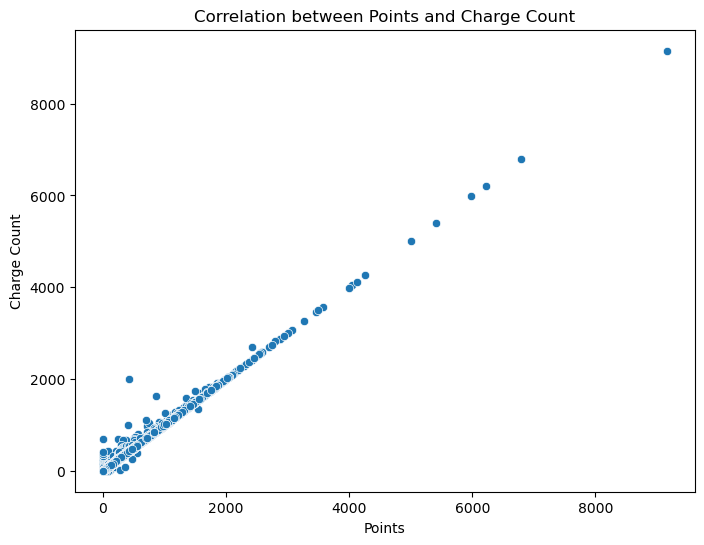

In [ ]:
# Correlation analysis
corr, p_value = pearsonr(data['Points'], data['Charge Count'])
print(f"Question 3: Correlation between Points and Charge Count: {corr:.2f}, P-value: {p_value:.2e}")

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Points', y='Charge Count', data=data)
plt.title('Correlation between Points and Charge Count')
plt.show()


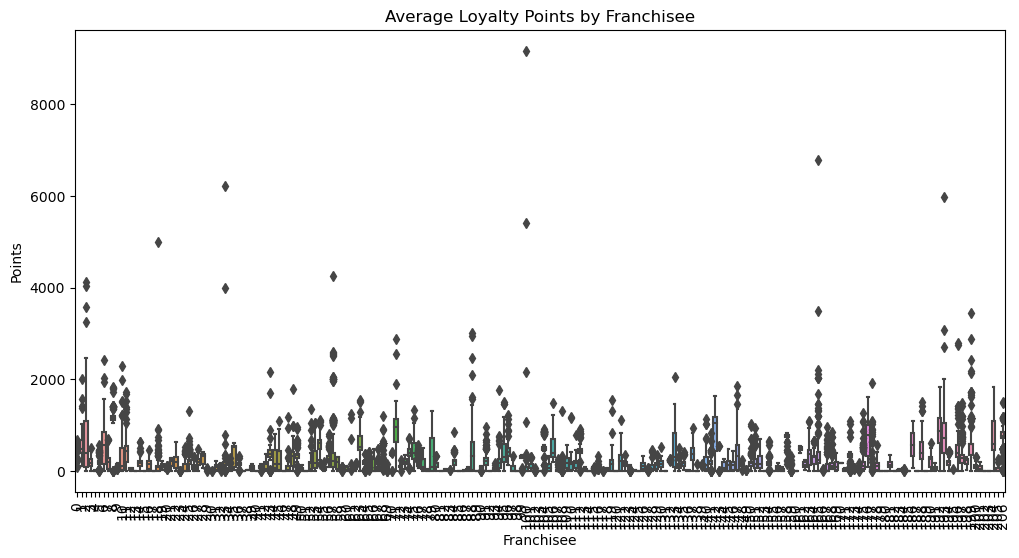

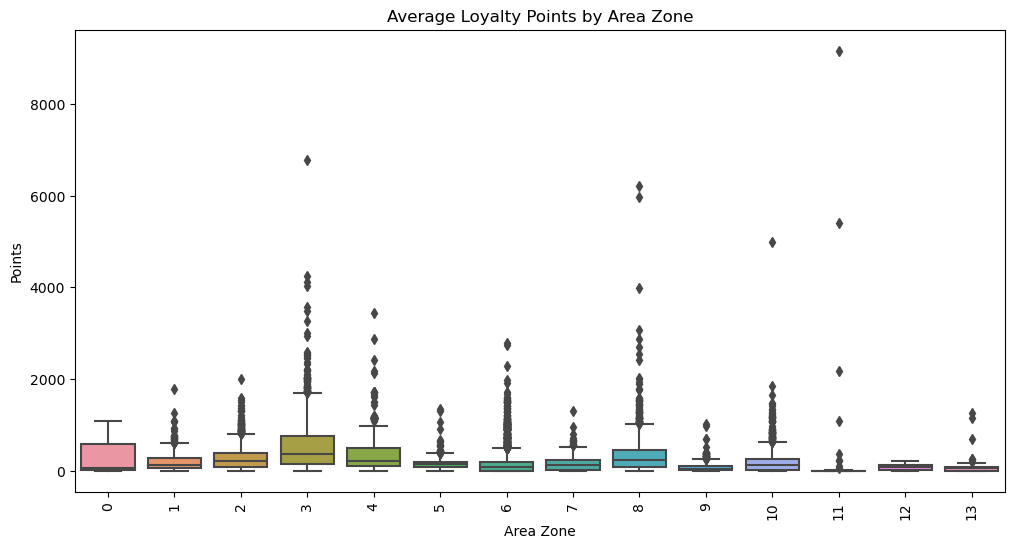

In [ ]:
# Boxplot for Points by Franchisee
plt.figure(figsize=(12, 6))
sns.boxplot(x='Franchisee', y='Points', data=data)
plt.title('Average Loyalty Points by Franchisee')
plt.xticks(rotation=90)
plt.show()

# Boxplot for Points by Area Zone
plt.figure(figsize=(12, 6))
sns.boxplot(x='Area Zone', y='Points', data=data)
plt.title('Average Loyalty Points by Area Zone')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Prepare data for regression model predicting Charge Count from Points
X_q3 = data[['Points']]
y_q3 = data['Charge Count']

# Standardize Points for regression
X_q3_scaled = scaler.fit_transform(X_q3)

# Train-test split
X_train_q3, X_test_q3, y_train_q3, y_test_q3 = train_test_split(X_q3_scaled, y_q3, test_size=0.3, random_state=42)

# Build regression neural network
model_q3 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_q3.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)  # No activation for regression
])

model_q3.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history_q3 = model_q3.fit(X_train_q3, y_train_q3, epochs=20, batch_size=32, validation_data=(X_test_q3, y_test_q3))

# Evaluate the regression model
loss, mae = model_q3.evaluate(X_test_q3, y_test_q3)
print(f"Question 3: Regression Model MAE for Charge Count Prediction: {mae:.2f}")


Epoch 1/20
442/442 [==============================] - 2s 2ms/step - loss: 162773.6719 - mae: 244.0373 - val_loss: 93424.1562 - val_mae: 172.1791
Epoch 2/20
442/442 [==============================] - 1s 2ms/step - loss: 27159.8926 - mae: 84.8593 - val_loss: 3700.6177 - val_mae: 27.9525
Epoch 3/20
442/442 [==============================] - 1s 2ms/step - loss: 1494.0173 - mae: 17.9716 - val_loss: 1412.8784 - val_mae: 17.1014
Epoch 4/20
442/442 [==============================] - 1s 2ms/step - loss: 881.6039 - mae: 14.0671 - val_loss: 1113.7970 - val_mae: 12.4432
Epoch 5/20
442/442 [==============================] - 1s 2ms/step - loss: 701.2280 - mae: 11.4978 - val_loss: 984.4720 - val_mae: 11.3548
Epoch 6/20
442/442 [==============================] - 1s 2ms/step - loss: 614.2681 - mae: 10.3663 - val_loss: 917.5736 - val_mae: 9.3874
Epoch 7/20
442/442 [==============================] - 1s 2ms/step - loss: 568.8724 - mae: 9.0577 - val_loss: 876.0228 - val_mae: 8.2349
Epoch 8/20
442/442 [====

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import ipywidgets as widgets
from IPython.display import display

# Sample data to fit scalers and encoders - replace with actual training data
data = {
    'Cumulative Points': np.random.randint(0, 50, 100),
    'Subscription Duration': np.random.randint(1, 365, 100),
    'Franchisee Average Charge': np.random.randint(50, 300, 100),
    'Gender': np.random.choice(['Male', 'Female'], 100),
    'Area Zone': np.random.choice(['Antsirabe', 'Bongolava', 'Antananarivo', 'Fianarantsoa', 'Majunga', 'Tamatave', 'Fort Dauphin', 'Ambalavao'], 100)
}
df = pd.DataFrame(data)

# Fit scalers on numerical features
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

numeric_features = ['Cumulative Points', 'Subscription Duration', 'Franchisee Average Charge']
X_numeric = scaler_minmax.fit_transform(scaler_standard.fit_transform(df[numeric_features]))

# One-hot encode categorical features
categorical_features = ['Gender', 'Area Zone']
encoder = OneHotEncoder(sparse_output=False)  # Updated parameter
X_categorical = encoder.fit_transform(df[categorical_features])

# Combine numeric and categorical features for full training data
X_train_combined = np.hstack([X_numeric, X_categorical])
y_train = np.random.randint(0, 2, 100)  # Binary target for demonstration

# Define the optimized neural network model with regularization and batch normalization
model_q2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_combined.shape[1],)),
    BatchNormalization(),
    Dropout(0.1),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with a lower learning rate
model_q2.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_q2 = model_q2.fit(X_train_combined, y_train, epochs=10, batch_size=32, validation_split=0.3, callbacks=[early_stopping])

# Define the UI widgets
points_input = widgets.FloatText(description="Customer Points History:", style={'description_width': 'initial'})
duration_input = widgets.IntText(description="Subscription Duration (days):", style={'description_width': 'initial'})
franchisee_perf_input = widgets.FloatText(description="Franchisee Performance (avg charge):", style={'description_width': 'initial'})
gender_input = widgets.Dropdown(options=['Male', 'Female'], description="Gender:", style={'description_width': 'initial'})
area_zone_input = widgets.Dropdown(
    options=['Antsirabe', 'Bongolava', 'Antananarivo', 'Fianarantsoa', 'Majunga', 'Tamatave', 'Fort Dauphin', 'Ambalavao'],
    description="Area Zone:",
    style={'description_width': 'initial'}
)

# Prediction button and output
predict_button = widgets.Button(description="Predict Retention")
output = widgets.Output()

# Prediction function
def predict_customer_retention(button):
    # Gather input data
    points = points_input.value
    duration = duration_input.value
    franchisee_perf = franchisee_perf_input.value
    gender = gender_input.value
    area_zone = area_zone_input.value

    # Process inputs for model
    # Numeric data processing
    numeric_data = np.array([[points, duration, franchisee_perf]])
    numeric_data_standardized = scaler_standard.transform(numeric_data)
    numeric_data_normalized = scaler_minmax.transform(numeric_data_standardized)

    # One-hot encode categorical features
    categorical_data = encoder.transform([[gender, area_zone]])

    # Combine numeric and categorical data
    input_data = np.hstack([numeric_data_normalized, categorical_data])
    input_data = input_data.reshape(1, -1)  # Ensure the input shape is correct for prediction

    # Predict retention probability
    retention_prob = model_q2.predict(input_data)[0][0]

    # Display result
    output.clear_output()
    with output:
        if retention_prob > 0.5:
            print(f"Prediction: Likely to Continue Using Service (Retention Probability: {retention_prob:.2f})")
        else:
            print(f"Prediction: Unlikely to Continue Using Service (Retention Probability: {retention_prob:.2f})")

# Set up button click event
predict_button.on_click(predict_customer_retention)

# Display the interface
display(points_input, duration_input, franchisee_perf_input, gender_input, area_zone_input, predict_button, output)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.5085 - loss: 0.7951 - val_accuracy: 0.4000 - val_loss: 0.7116
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5331 - loss: 0.8292 - val_accuracy: 0.3667 - val_loss: 0.7113
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5709 - loss: 0.7245 - val_accuracy: 0.3667 - val_loss: 0.7101
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5306 - loss: 0.7705 - val_accuracy: 0.3667 - val_loss: 0.7091
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5299 - loss: 0.7969 - val_accuracy: 0.4000 - val_loss: 0.7080
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5104 - loss: 0.8211 - val_accuracy: 0.4333 - val_loss: 0.7069
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5221 - loss: 0.8259 - val_accuracy: 0.4667 - val_loss: 0.7061
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5598 - loss: 0.7957 - val_accuracy: 0.4667 - val_loss: 0.7052
Epoch 9/10

FloatText(value=0.0, description='Customer Points History:', style=DescriptionStyle(description_width='initial…

IntText(value=0, description='Subscription Duration (days):', style=DescriptionStyle(description_width='initia…

FloatText(value=0.0, description='Franchisee Performance (avg charge):', style=DescriptionStyle(description_wi…

Dropdown(description='Gender:', options=('Male', 'Female'), style=DescriptionStyle(description_width='initial'…

Dropdown(description='Area Zone:', options=('Antsirabe', 'Bongolava', 'Antananarivo', 'Fianarantsoa', 'Majunga…

Button(description='Predict Retention', style=ButtonStyle())

Output()

In [ ]:
data.shape

(20173, 17)

In [ ]:
# Check for missing values
print("Missing Values in Each Column:")
print(data.isnull().sum())

# Display data types of each column
print("\nData Types of Each Column:")
print(data.dtypes)

# Display unique values in each column (to identify categorical features)
print("\nUnique Values in Categorical Columns:")
for col in data.columns:
    if data[col].dtype == 'object' or data[col].nunique() < 20:  # Heuristic for categorical columns
        print(f"{col}: {data[col].unique()}")

# Confirm the target variable
target_variable = 'Retention'  # Ensure this matches the actual name of the target column
print("\nUnique values in the target column:", data[target_variable].unique())


Missing Values in Each Column:
Customer No.                  0
Customer Code                 0
Area Zone                   334
Address Description        2640
Gender                      516
Type                      14792
Franchisee                    0
Franchisee Code             201
Status                        0
Points                        0
Points Monthly             8317
Charge Count                  0
Subscription Date-Time        4
Unsubscribe Date-Time     16685
Items                      5921
Items Count                   0
Current Lighting          12686
dtype: int64

Data Types of Each Column:
Customer No.               int64
Customer Code             object
Area Zone                 object
Address Description       object
Gender                    object
Type                      object
Franchisee                object
Franchisee Code           object
Status                    object
Points                     int64
Points Monthly            object
Charge Count         

KeyError: 'Retention'